<a href="https://colab.research.google.com/github/AnaghaNithin/DSA-PythonCaseStudy/blob/main/TestData_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
# Load datasets
train_df= pd.read_csv('/content/train_LZdllcl.csv')
test_df= pd.read_csv('/content/test_2umaH9m.csv')

In [47]:
# Step 1: Exploratory Data Analysis (EDA)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


<ipython-input-49-51c9d6e0764c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["is_promoted"], palette="coolwarm")


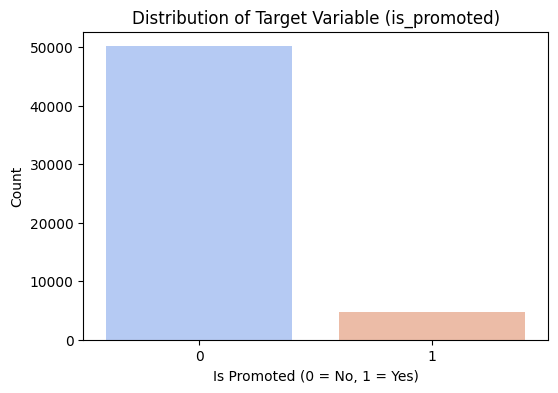

In [49]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df["is_promoted"], palette="coolwarm")
plt.title("Distribution of Target Variable (is_promoted)")
plt.xlabel("Is Promoted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

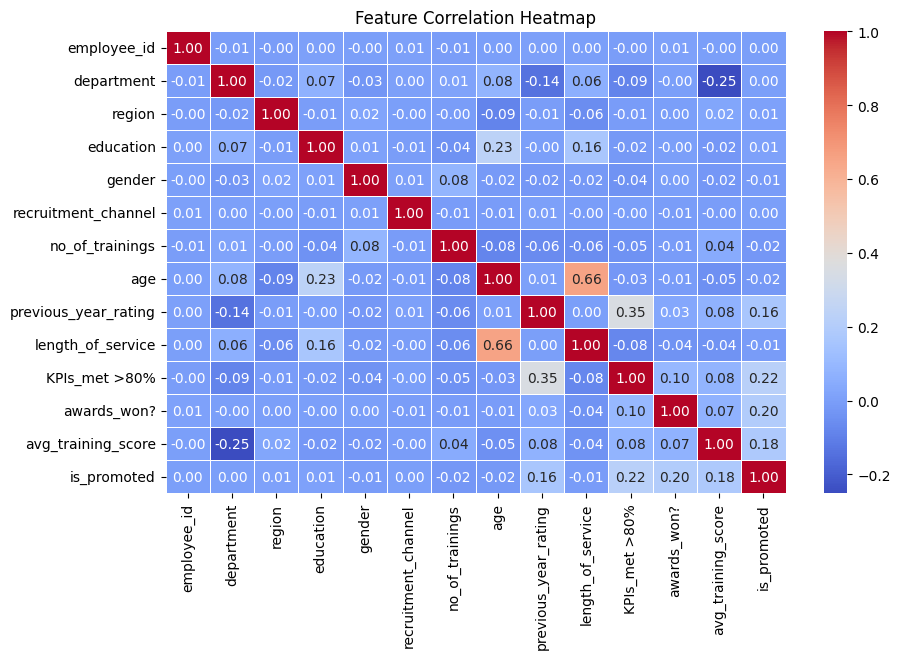

In [50]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables for correlation analysis
categorical_cols = ["department", "region", "education", "gender", "recruitment_channel"]
encoder = LabelEncoder()

# copy of train_df to avoid modifying the original dataset
train_encoded = train_df.copy()

for col in categorical_cols:
    train_encoded[col] = encoder.fit_transform(train_encoded[col])

# plot the heatmap with numerical values
plt.figure(figsize=(10, 6))
sns.heatmap(train_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [51]:
# Step 2: Handling Missing Values (Corrected)
train_df["education"] = train_df["education"].fillna(train_df["education"].mode()[0])
test_df["education"] = test_df["education"].fillna(test_df["education"].mode()[0])

train_df["previous_year_rating"] = train_df["previous_year_rating"].fillna(train_df["previous_year_rating"].median())
test_df["previous_year_rating"] = test_df["previous_year_rating"].fillna(test_df["previous_year_rating"].median())



In [52]:
# Step 3: Encoding Categorical Variables
categorical_cols = ["department", "region", "education", "gender", "recruitment_channel"]
encoder = LabelEncoder()

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [53]:
# Step 4: Prepare Data for Training
X = train_df.drop(columns=["employee_id", "is_promoted"])
y = train_df["is_promoted"]

In [54]:
# Split train-validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Step 5: Train a Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Step 6: Evaluate Model
y_pred = rf.predict(X_val)
print("\nModel Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Model Accuracy: 0.9347746761539865

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.42       908

    accuracy                           0.93     10962
   macro avg       0.87      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962


Confusion Matrix:
 [[9991   63]
 [ 652  256]]


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid (reduced for faster execution)
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,  # Limits the number of combinations tested
    cv=3,  # 3-fold cross-validation
    scoring="accuracy",
    n_jobs=-1,  # Uses all CPU cores for parallel computation
    random_state=42
)

# Fit the model with the best parameters
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_
print("\nBest Parameters:", random_search.best_params_)



Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [58]:
# Step 8: Make Predictions on Test Data
X_test = test_df.drop(columns=["employee_id"])
test_df["is_promoted"] = best_model.predict(X_test)


In [59]:
import pandas as pd

# Load the sample submission file
submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')



In [60]:
# Prepare the test data (Drop 'employee_id' if present)
X_test = test_df.drop(columns=["employee_id"], errors='ignore')



In [61]:
# Drop 'employee_id' and 'is_promoted' from test dataset if present
X_test = test_df.drop(columns=["employee_id", "is_promoted"], errors='ignore')


In [62]:
# Predict using the best model
submission["is_promoted"] = best_model.predict(X_test)


In [63]:
# Save the new submission file
submission.to_csv("final_submission.csv", index=False)

print("Submission file 'final_submission.csv' saved successfully!")

Submission file 'final_submission.csv' saved successfully!
